<a href="https://colab.research.google.com/github/legendary-idiot/ARIMA_Model/blob/main/PM2_5_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install Prophet and Dependencies**

In [ ]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# **2. Data Import and Visualize**

In [3]:
df = pd.read_csv('/content/Pollutant_Data/Pollutant Data.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1095 non-null   object 
 1   SO2     1095 non-null   float64
 2   NO      1095 non-null   float64
 3   NO2     1095 non-null   float64
 4   NOx     1095 non-null   float64
 5   O3      1095 non-null   float64
 6   PM2.5   1095 non-null   float64
 7   PM10    1095 non-null   float64
dtypes: float64(7), object(1)
memory usage: 68.6+ KB


In [7]:
df.head()

,Date,SO2,NO,NO2,NOx,O3,PM2.5,PM10
0,1-Jan-21,2.0590,31.3940,19.0900,50.4840,11.7230,27.3530,112.4580
1,2-Jan-21,2.5045,38.0809,32.8662,72.0315,11.5146,51.8938,178.5706
2,3-Jan-21,2.9500,46.1920,56.5840,102.7760,11.3100,98.4525,283.5500
3,4-Jan-21,2.8667,35.8671,27.4246,58.8083,27.7379,71.7288,197.7121
4,5-Jan-21,2.9475,47.4900,29.2929,74.8042,22.7471,86.1671,195.8113


In [8]:
df.tail()

,Date,SO2,NO,NO2,NOx,O3,PM2.5,PM10
1090,27-Dec-23,7.4313,32.0225,8.9050,38.7013,2.5577,172.9479,233.7886
1091,28-Dec-23,5.4300,10.2100,17.9800,28.1900,2.5225,243.0800,311.2325
1092,29-Dec-23,5.1629,14.5946,10.6950,25.2896,2.5363,141.5100,228.3850
1093,30-Dec-23,4.8596,4.9267,8.9063,13.8329,2.5204,79.0046,150.1833
1094,31-Dec-23,4.6693,12.3886,9.1957,21.5843,2.5307,92.4479,147.1693


# **3. Select Data to Predict**

In [9]:
df=df[["Date","PM2.5"]]
df.head()

,Date,PM2.5
0,1-Jan-21,27.3530
1,2-Jan-21,51.8938
2,3-Jan-21,98.4525
3,4-Jan-21,71.7288
4,5-Jan-21,86.1671


**Change Column Names for FBProphet**

In [10]:
df.columns = ['ds','y']

**Convert Date Format to YY-MM-DD**

In [12]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1090,2023-12-27,172.9479
1091,2023-12-28,243.0800
1092,2023-12-29,141.5100
1093,2023-12-30,79.0046
1094,2023-12-31,92.4479


# **4. Start Making Predictions**

In [15]:
m = Prophet(daily_seasonality=True)
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqr4tzq5r/k7ohmuvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqr4tzq5r/go_ngbqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60378', 'data', 'file=/tmp/tmpqr4tzq5r/k7ohmuvp.json', 'init=/tmp/tmpqr4tzq5r/go_ngbqp.json', 'output', 'file=/tmp/tmpqr4tzq5r/prophet_model188ilui1/prophet_model-20240418085204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Predictions for 1 Year (365 Days)**

In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1455,2024-12-26
1456,2024-12-27
1457,2024-12-28
1458,2024-12-29
1459,2024-12-30


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1455,2024-12-26,98.324452,41.799861,150.705270
1456,2024-12-27,94.686959,31.662749,145.186527
1457,2024-12-28,95.698846,36.709210,152.192116
1458,2024-12-29,95.252214,36.842452,150.151806
1459,2024-12-30,96.577379,34.918315,149.981217


# **5. Plot the Predicted Data**

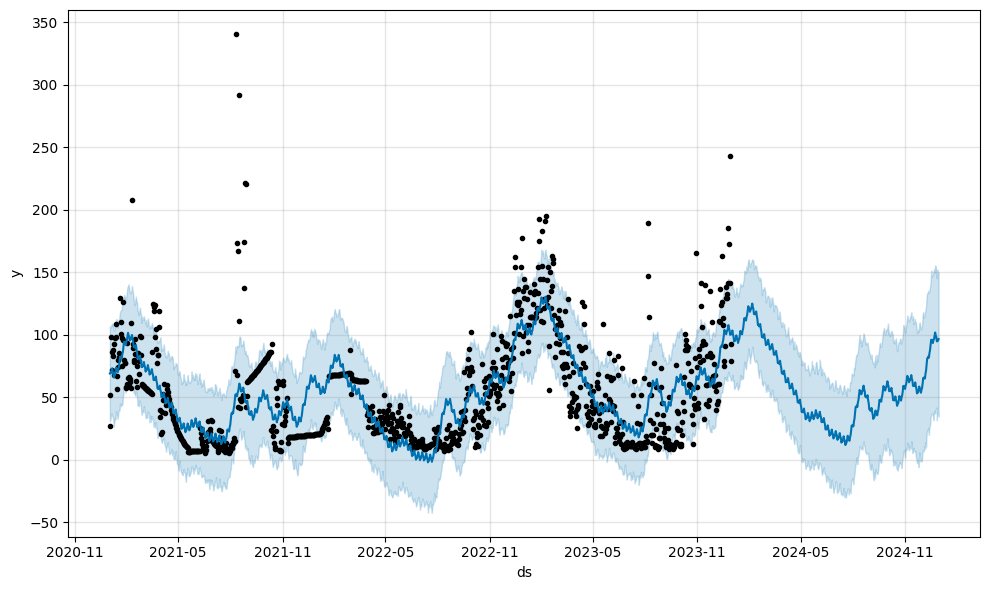

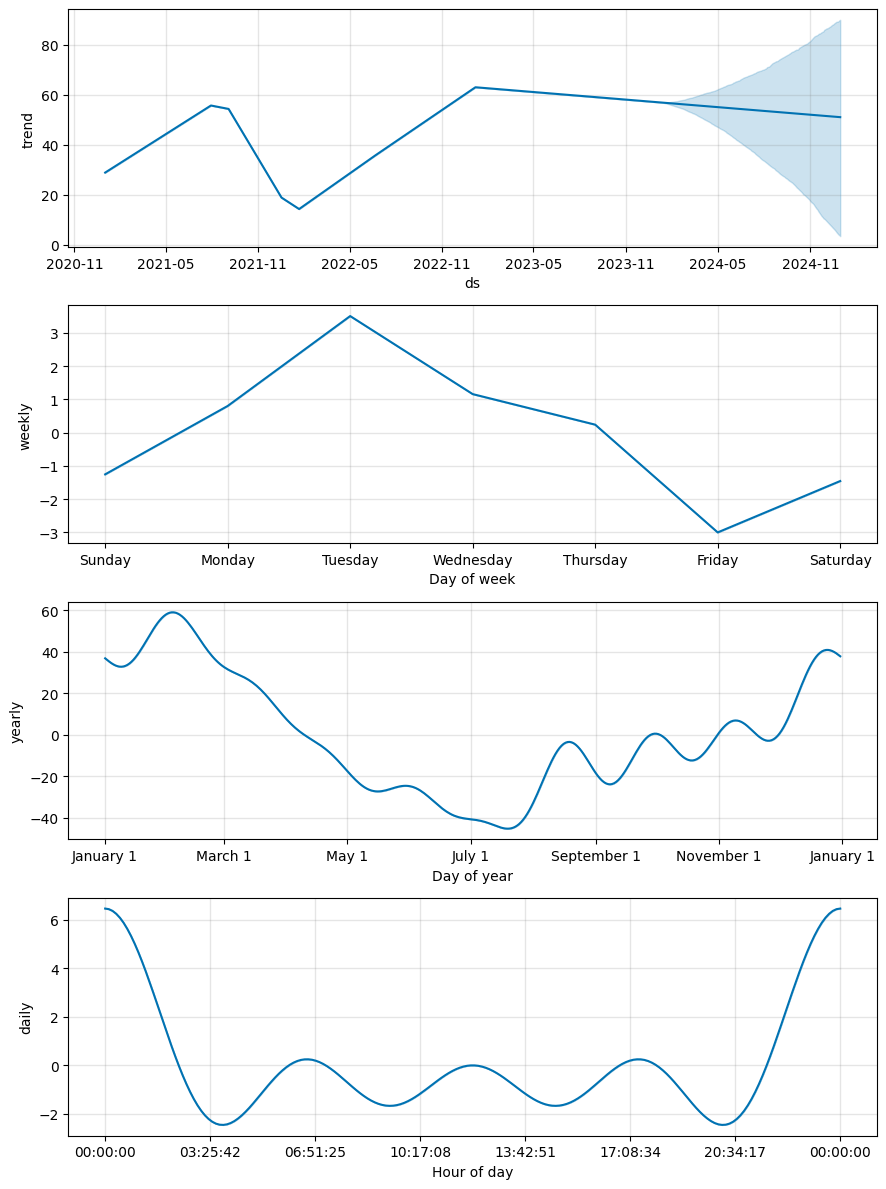

In [18]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

**Interactive Plot**

In [19]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# **6. Export the Predicted Data**

In [21]:
export = forecast[["ds", "yhat"]]
export.tail()

,ds,yhat
1455,2024-12-26,98.324452
1456,2024-12-27,94.686959
1457,2024-12-28,95.698846
1458,2024-12-29,95.252214
1459,2024-12-30,96.577379


In [22]:
export.to_csv('/content/Pollutant_Data/Predicted_PM2.5.csv')